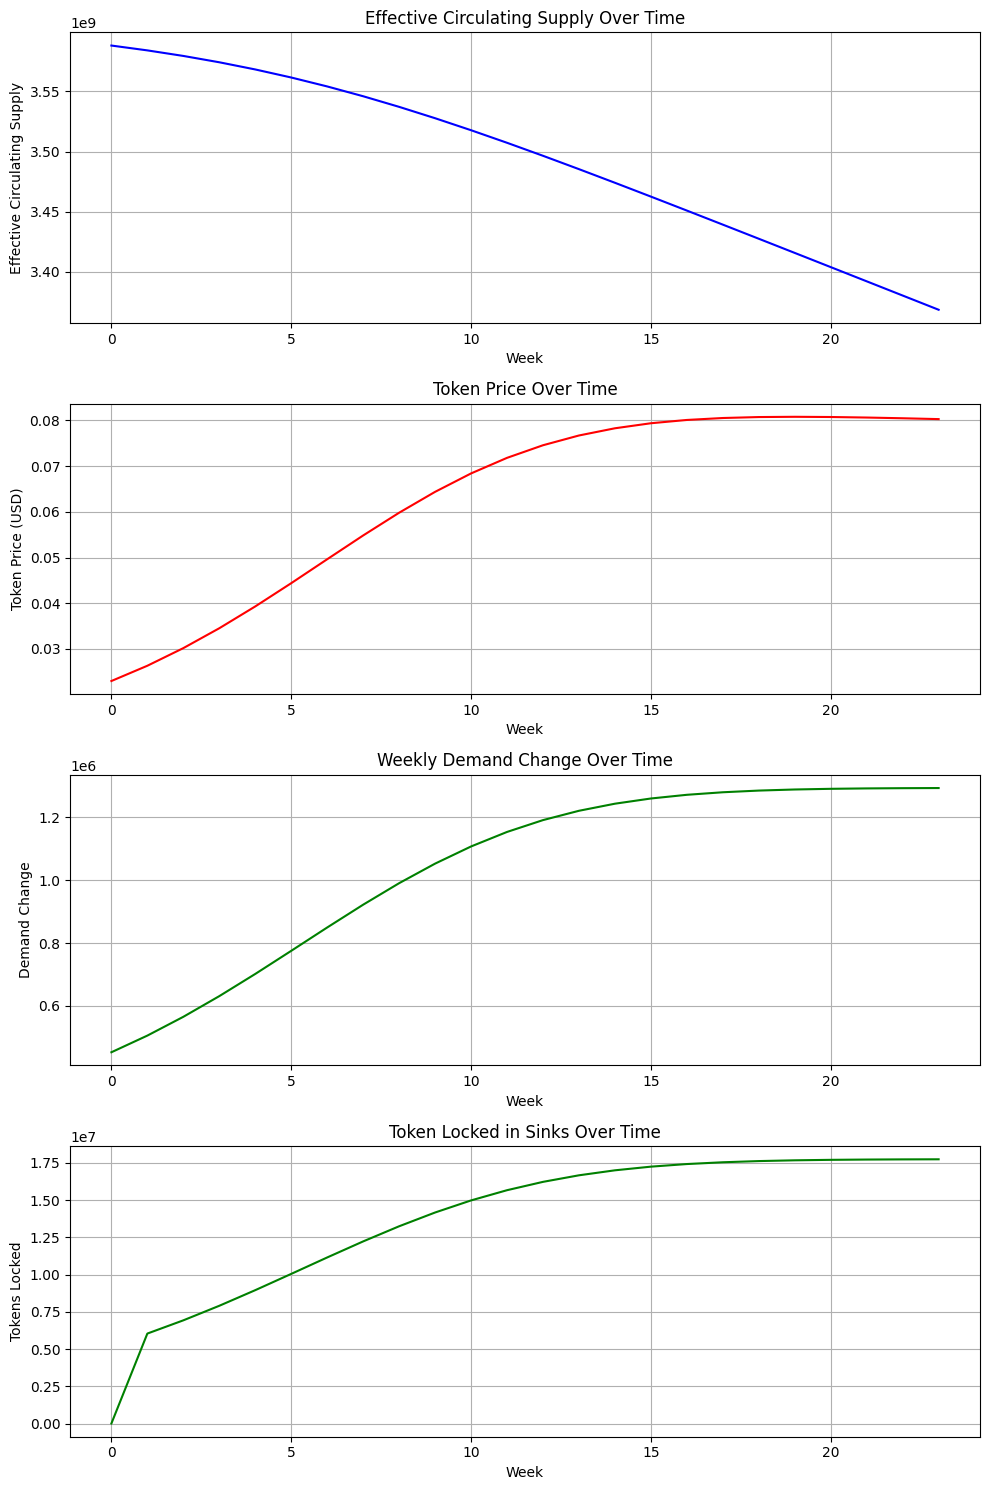

,Week,Transactions,Tokens Locked,Tokens Released,Weekly Supply Change,Weekly Demand Change,Circulating Supply,Percentage change Price,Token Price
0,0,7.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.530000e+05,3.588164e+09,0.000000,0.022990
1,1,8.050000e+06,6.037500e+06,2.012500e+06,-4.025000e+06,5.059500e+05,3.584139e+09,0.145245,0.026329
2,2,9.233350e+06,6.925012e+06,2.308338e+06,-4.616675e+06,5.656247e+05,3.579522e+09,0.146440,0.030185
3,3,1.053636e+07,7.902270e+06,2.634090e+06,-5.268180e+06,6.313336e+05,3.574254e+09,0.144079,0.034534
4,4,1.193404e+07,8.950529e+06,2.983510e+06,-5.967019e+06,7.018165e+05,3.568287e+09,0.138265,0.039309
5,5,1.339047e+07,1.004286e+07,3.347619e+06,-6.695237e+06,7.752625e+05,3.561592e+09,0.129368,0.044394
6,6,1.486124e+07,1.114593e+07,3.715310e+06,-7.430619e+06,8.494310e+05,3.554161e+09,0.117978,0.049631
7,7,1.629767e+07,1.222325e+07,4.074417e+06,-8.148834e+06,9.218681e+05,3.546012e+09,0.104829,0.054834
8,8,1.765240e+07,1.323930e+07,4.413100e+06,-8.826200e+06,9.901853e+05,3.537186e+09,0.090715,0.059809
9,9,1.888497e+07,1.416373e+07,4.721242e+06,-9.442484e+06,1.052342e+06,3.527743e+09,0.076407,0.064378


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
initial_circulating_supply = 3_588_163_660
initial_price = 0.02299

initial_weekly_transactions=7000000  # Bonding Curve Transactions
buy_transactions = 0.75 
sell_transactions = 0.25
D0 = 100000  # Base demand of tokens
Delta_Dc = 70000  # Tokens Allocated to utility1 (Credits purchasing utility)
Delta_Dl = 500000  # Tokens Allocated for utility2 (liquidity pools creation utility) 
kc = 0.4  # Coefficient for token utility1 (credits purchased demand)
kl = 0.65  # Coefficient for token utility2 (agnetic liquidity pools demand)
kd = 0.4  # Sensitivity of price to demand changes
ks = 0.6  # Sensitivity of price to supply changes
epsilon_d = 0.8  # Price elasticity of demand 
epsilon_s = 1.3  # Price elasticity of supply
weeks = 24
growth_rate = 0.15 # Weekly growth rate
growth_rate_decay = 0.02 # Growth rate decays in each week by 2% 

# Initialize data arrays
weekly_transactions = np.zeros(weeks)
tokens_locked = np.zeros(weeks)
tokens_released = np.zeros(weeks)
net_supply_change = np.zeros(weeks)
circulating_supply = np.zeros(weeks)
token_price = np.zeros(weeks)
net_demand_change = np.zeros(weeks)
price_change = np.zeros(weeks)
    
# Initial conditions
weekly_transactions[0] = initial_weekly_transactions
circulating_supply[0] = initial_circulating_supply
token_price[0] = initial_price
net_demand_change[0] = D0 + kc * Delta_Dc + kl * Delta_Dl
price_change[0]=0

# Model each week
for week in range(1, weeks):

    weekly_transactions[week] = weekly_transactions[week - 1] * (1 + growth_rate)
    tokens_locked[week] = weekly_transactions[week] * buy_transactions
    tokens_released[week] = weekly_transactions[week] * sell_transactions
    net_supply_change[week] = tokens_released[week] - tokens_locked[week] 
    circulating_supply[week] = circulating_supply[week - 1] + net_supply_change[week]

    # Recalculate demand increase for the week
    Delta_Dc *= (1 + growth_rate)  
    Delta_Dl *= (1 + growth_rate)  
    net_demand_change[week] = D0 + kc * Delta_Dc + kl * Delta_Dl

    # Price adjustment based on the change in demand and circulating supply
    
    delta_D = net_demand_change[week] - net_demand_change[week - 1]
    delta_S = net_supply_change[week]  
    
    # Price adjustment using price elasticities
    price_change_due_to_demand = (delta_D / (net_demand_change[week - 1] * epsilon_d))
    price_change_due_to_supply = (delta_S / ((circulating_supply[week - 1] + delta_S) * epsilon_s))

    # Net price change and new price calculation
    price_change[week] = price_change_due_to_demand + price_change_due_to_supply
    token_price[week] = token_price[week - 1] * (1 + price_change[week])

    # Growth rate decay on weekly basis
    growth_rate = growth_rate*(1-week*growth_rate_decay)

# Update results DataFrame with new calculations
updated_results = pd.DataFrame({
    "Week": np.arange(weeks),
    "Transactions": weekly_transactions,
    "Tokens Locked": tokens_locked,
    "Tokens Released": tokens_released,
    "Weekly Supply Change": net_supply_change,
    "Weekly Demand Change": net_demand_change,
    "Circulating Supply": circulating_supply,
    "Percentage change Price": price_change,
    "Token Price": token_price,
    
})


# Plotting the results with the revised price adjustment
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Plot for Circulating Supply
axs[0].plot(updated_results['Week'], updated_results['Circulating Supply'], label='Circulating Supply', color='blue')
axs[0].set_title('Effective Circulating Supply Over Time')
axs[0].set_xlabel('Week')
axs[0].set_ylabel('Effective Circulating Supply')
axs[0].grid(True)

# Plot for Token Price
axs[1].plot(updated_results['Week'], updated_results['Token Price'], label='Token Price', color='red')
axs[1].set_title('Token Price Over Time')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Token Price (USD)')
axs[1].grid(True)

# Plot for Demand Increase
axs[2].plot(updated_results['Week'], updated_results['Weekly Demand Change'], label='Weekly Demand Change', color='green')
axs[2].set_title('Weekly Demand Change Over Time')
axs[2].set_xlabel('Week')
axs[2].set_ylabel('Demand Change')
axs[2].grid(True)

# Plot for Demand Increase
axs[3].plot(updated_results['Week'], updated_results['Tokens Locked'], label='Tokens Locked', color='green')
axs[3].set_title('Token Locked in Sinks Over Time')
axs[3].set_xlabel('Week')
axs[3].set_ylabel('Tokens Locked')
axs[3].grid(True)

plt.tight_layout()
plt.show()

updated_results